In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np

import cmbo
from IPython.display import display

from plot_cluster import *
from score_individual_objects import *

%load_ext autoreload
%autoreload 2

/Users/rstiskalek/Projects/CMBOlympics/venv_cmbo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = cmbo.utils.load_config("/Users/rstiskalek/Projects/CMBOlympics/scripts/config.toml")
obs_clusters = cmbo.io.load_observed_clusters(cfg['paths']['observed_clusters'])


In [13]:
associations, matches, boxsize = load_associations_and_matches("csiborg2", cfg)

Loaded 20 simulation realisations.
Identified 358 halo associations.
Loaded 19 observed clusters.


100%|██████████| 358/358 [00:02<00:00, 168.07it/s]

Perseus (A426): min p-value = 9.167e-01
Cluster 17 (Shapley (A3562)) now orphaned (best remaining p=9.335e-02)
Cluster 18 (Perseus (A426)) now orphaned (best remaining p=9.167e-01)
Cluster 8 (Hercules (A2147)) now orphaned (best remaining p=1.303e-01)
Halo signal datasets were not found in the run_suite output; p-values only.


In [32]:
print_cluster_scores(cfg, matches, obs_clusters,)

                                                                                                                   tSZ significance            
Cluster                  Assoc   Frac  logM [Msun/h] Pfeifer pval  Dist [Mpc/h]  ell [deg]    b [deg]    Frac p<0.05     P05%     P50%     P95%
-----------------------------------------------------------------------------------------------------------------------------------------------
Abell 1644                   6   1.00          14.47      3.0e-03       139.240     305.01      45.34        100.00%  4.3e-03  5.4e-03  6.5e-03
Abell 119                    8   1.00          14.62      7.7e-04       125.820     125.51     -64.09        100.00%  6.4e-03  6.4e-03  6.4e-03
Abell 548                   14   1.00          14.25      1.7e-03       120.259     230.17     -24.48         40.00%  3.5e-02  5.1e-02  8.1e-02
Abell 1736                   5   1.00          14.69      3.4e-05       136.163     312.77      34.93        100.00%  5.4e-03  6.4e-03  

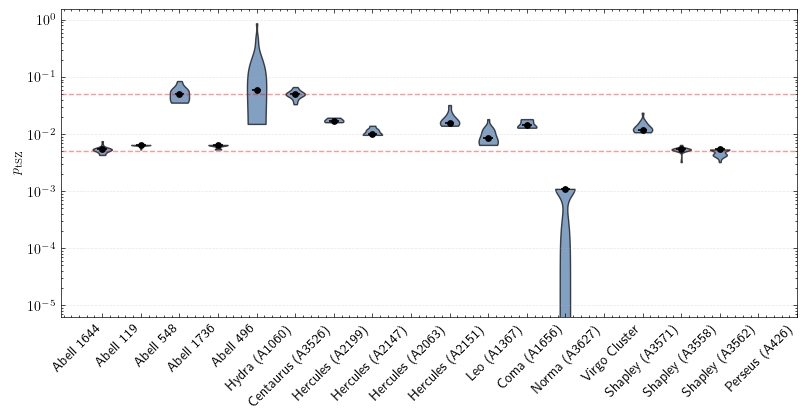

In [33]:
fig, ax = plot_cluster_pvalue_violins(cfg, matches, obs_clusters)
fig.savefig("/Users/rstiskalek/Downloads/cluster_pvalue_violins.png", dpi=300, bbox_inches="tight")
display(fig)

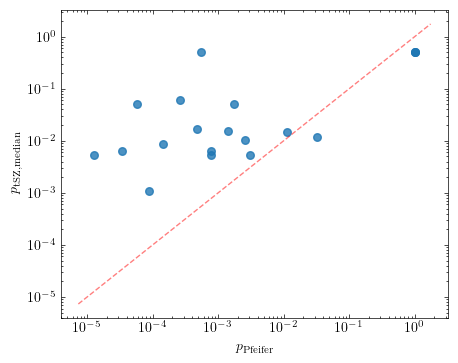

In [31]:
fig, ax = plot_pfeifer_vs_tsz(matches)
display(fig)

In [35]:
fname_cmb = "/Users/rstiskalek/Projects/CMBOlympics/data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits"
cmb_tsz = cmbo.io.read_Planck_comptonSZ(fname_cmb)
cmb_tsz = cmbo.utils.smooth_map_gaussian(cmb_tsz, fwhm_arcmin=9.6, )

profiler2d = cmbo.corr.Pointing2DCutout(cmb_tsz, fwhm_arcmin=9.6)

In [36]:
profiler2d.find_centers_observed_clusters(obs_clusters, size_arcmin=60)

Processing Abell 1644 (1/19)...
  Input: (304.878, 45.450)
  Peak:  (304.969, 45.442)
  Offset: 5.46 arcmin
Processing Abell 119 (2/19)...
  Input: (125.714, -64.062)
  Peak:  (125.659, -64.125)
  Offset: 5.00 arcmin
Processing Abell 548 (3/19)...
  Input: (230.287, -24.817)
  Peak:  (230.293, -24.476)
  Offset: 20.44 arcmin
Processing Abell 1736 (4/19)...
  Input: (312.569, 35.024)
  Peak:  (312.603, 35.025)
  Offset: 2.05 arcmin
Processing Abell 496 (5/19)...
  Input: (209.585, -36.485)
  Peak:  (209.554, -36.537)
  Offset: 3.66 arcmin
Processing Hydra (A1060) (6/19)...
  Input: (269.596, 26.488)
  Peak:  (269.582, 26.467)
  Offset: 1.52 arcmin
Processing Centaurus (A3526) (7/19)...
  Input: (302.399, 21.561)
  Peak:  (302.364, 21.607)
  Offset: 3.43 arcmin
Processing Hercules (A2199) (8/19)...
  Input: (62.931, 43.694)
  Peak:  (62.917, 43.657)
  Offset: 2.37 arcmin
Processing Hercules (A2147) (9/19)...
  Input: (28.970, 44.535)
  Peak:  (29.006, 44.527)
  Offset: 2.23 arcmin
Proces

Plotting 16/19 matched clusters
Skipping 3 unmatched: ['Hercules (A2147)', 'Shapley (A3562)', 'Perseus (A426)']


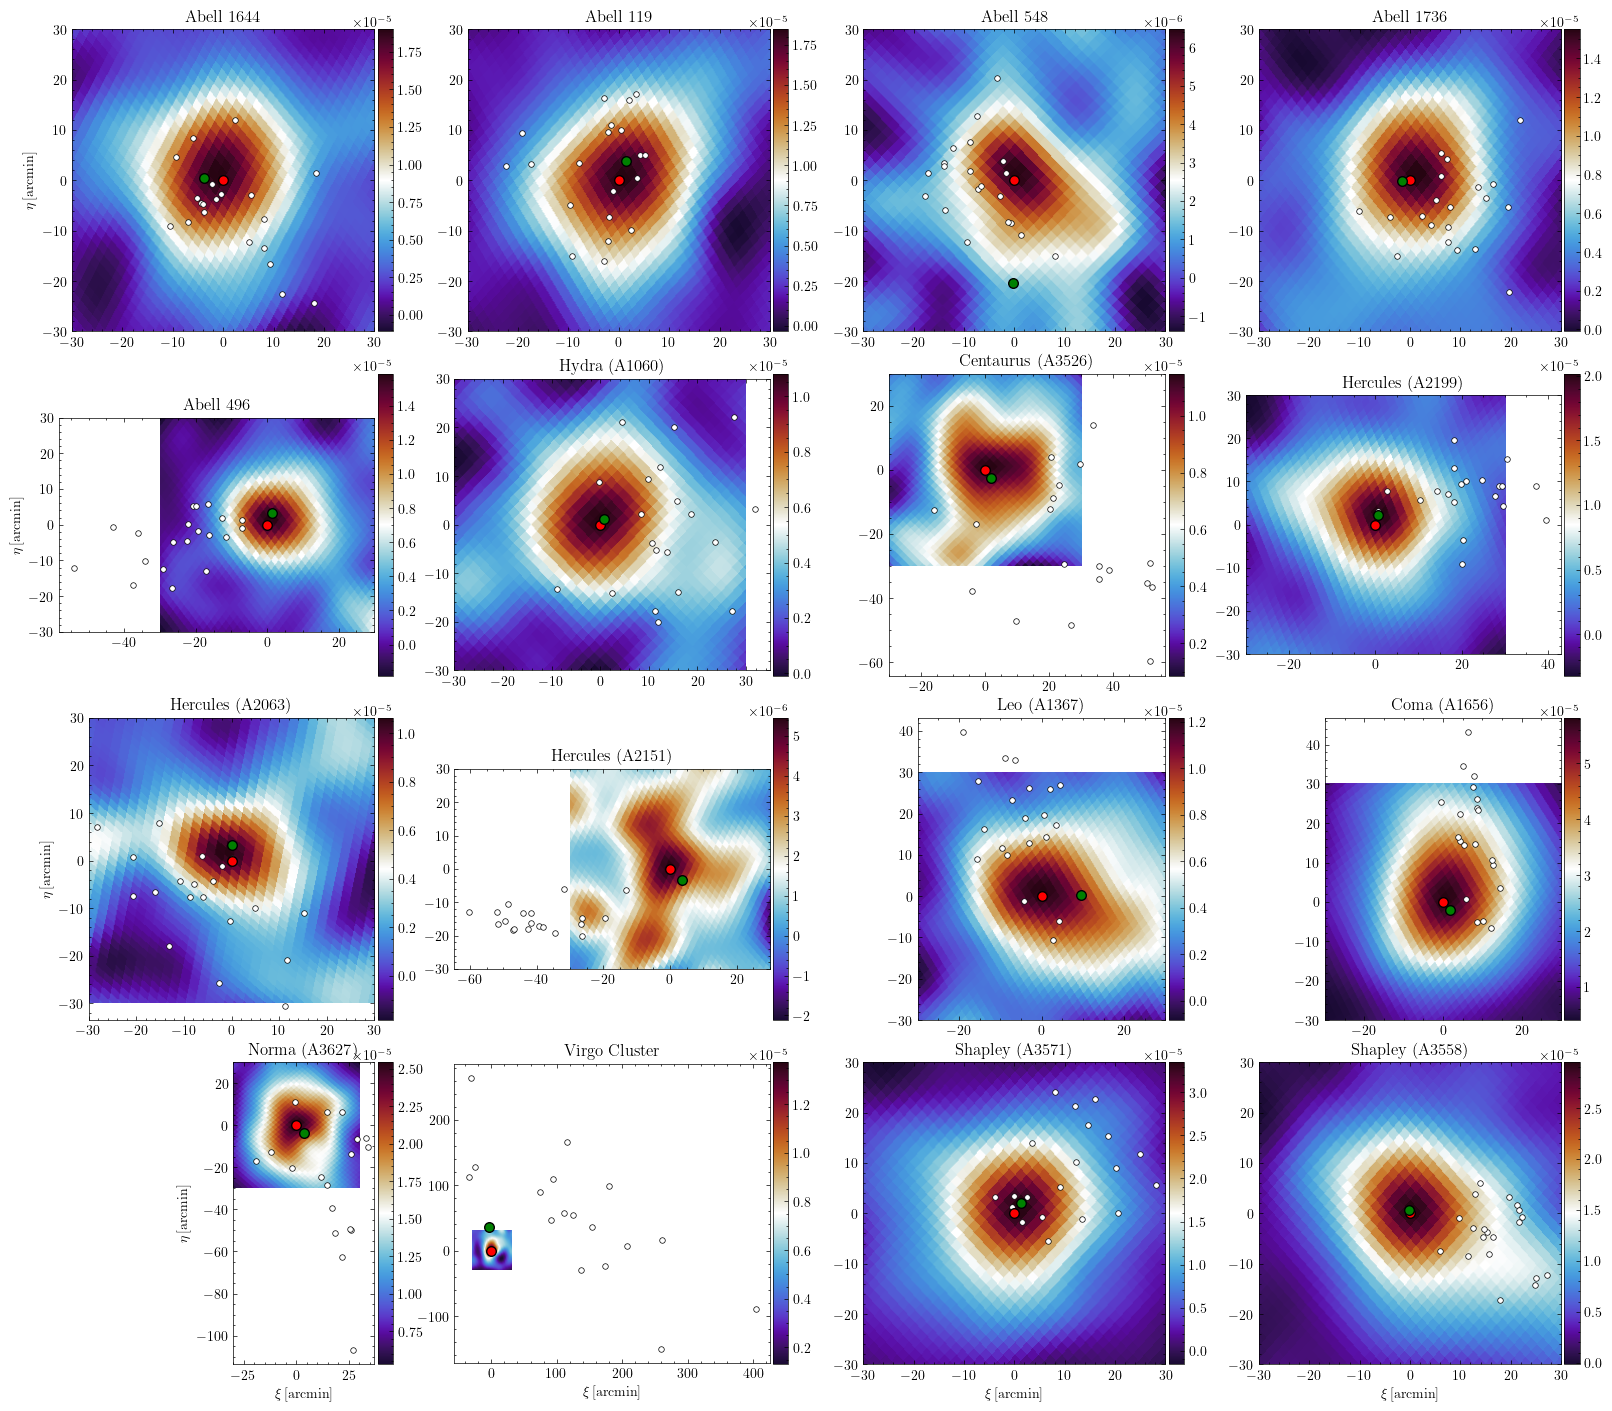

In [38]:
fig, ax = plot_observed_cluster_grid(obs_clusters, matches, boxsize,)

display(fig)